In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense
import tsaug

In [2]:
windows = np.load('windows.npy')
labels = np.load('labels.npy')
#print(labels)
#print(windows)
print(windows.shape)
print(windows)

(1439, 3, 2)
[[[0.0000e+00 0.0000e+00]
  [5.1000e-02 0.0000e+00]
  [1.0100e-01 0.0000e+00]]

 [[5.1000e-02 0.0000e+00]
  [1.0100e-01 0.0000e+00]
  [1.5200e-01 0.0000e+00]]

 [[1.0100e-01 0.0000e+00]
  [1.5200e-01 0.0000e+00]
  [2.0300e-01 0.0000e+00]]

 ...

 [[7.4749e+01 0.0000e+00]
  [7.4800e+01 0.0000e+00]
  [7.4851e+01 0.0000e+00]]

 [[7.4800e+01 0.0000e+00]
  [7.4851e+01 0.0000e+00]
  [7.4902e+01 0.0000e+00]]

 [[7.4851e+01 0.0000e+00]
  [7.4902e+01 0.0000e+00]
  [7.4953e+01 0.0000e+00]]]


In [3]:
num_classes = 8

In [4]:
lab_values = [0, 1, 2, 3, 4, 6, 7]
array_set = []
labels_set = []

for val in lab_values:
    ind = np.where( labels == val )
    print(ind)
    num_values = (ind[0].shape)[0]
    start_wind = windows[ind]
    new_ones = start_wind

    try: 
        length = ( ((np.where(labels==5))[0].shape)[0] - num_values ) // num_values
    except:
        length = 10 
    for i in range(0, length):
        augmenter = (
            tsaug.AddNoise(scale=0.05) + 
            tsaug.Drift(max_drift=0.1, n_drift_points=2)
        )
        augmented = augmenter.augment(start_wind)
        new_ones = np.concatenate((augmented, new_ones), axis=0)
    
    aug_labels = np.ones(shape=new_ones.shape[0]) * val
    labels_set.append(aug_labels)
    array_set.append(new_ones)

for i in range(len(array_set)):
    print(labels_set[i].shape)
    assert array_set[i].shape[0] == labels_set[i].shape[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),)
(array([61, 62, 63, 64, 65]),)
(array([ 66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118]),)
(array([119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 1

In [5]:
num = 0 
for i in range(len(array_set)):
    num += array_set[i].shape[0]

aug_stack = np.vstack( array_set ) 
labels_stack = np.concatenate(labels_set)
assert num == aug_stack.shape[0]
assert num == labels_stack.shape[0]

In [6]:
Xaug_train, Xaug_val, yaug_train, yaug_val = train_test_split(aug_stack, labels_stack, test_size=0.2, random_state=42, stratify=labels_stack)
xaug_flat = Xaug_train.reshape(Xaug_train.shape[0], -1)
xaug_val_flat = Xaug_val.reshape(Xaug_val.shape[0], -1)
print(xaug_flat.shape)

(6132, 6)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(windows, labels, test_size=0.2, random_state=42, stratify=labels)

x_flat = X_train.reshape(X_train.shape[0], -1)
x_val_flat = X_val.reshape(X_val.shape[0], -1)
print(x_flat.shape)
print(X_train.shape)
print(X_train)
print(y_train)

(1151, 6)
(1151, 3, 2)
[[[24.608  0.   ]
  [24.659  0.   ]
  [24.711  0.   ]]

 [[15.034  0.   ]
  [15.085  0.   ]
  [15.136  0.   ]]

 [[ 2.877  1.   ]
  [ 2.928  0.   ]
  [ 2.979  0.   ]]

 ...

 [[66.449  0.   ]
  [66.5    0.   ]
  [66.551  0.   ]]

 [[17.259  0.   ]
  [17.348  0.   ]
  [17.399  0.   ]]

 [[ 2.027  0.   ]
  [ 2.112  0.   ]
  [ 2.163  0.   ]]]
[5. 5. 0. ... 5. 5. 0.]


In [8]:
x_flat1 = np.concatenate( (x_flat, xaug_flat), axis=0 )
x_flat1_val = np.concatenate( (x_val_flat, xaug_val_flat), axis=0 )
y_train1 = np.concatenate( (y_train, yaug_train), axis=0 )
y_flat1_val = np.concatenate( (y_val, yaug_val ), axis=0 )

print(xaug_flat.shape[0] + x_flat.shape[0])
print( x_flat1.shape )

7283
(7283, 6)


In [9]:
print(x_flat1_val.shape)

(1822, 6)


In [10]:
model_CNN_man = tf.keras.Sequential([
    tf.keras.layers.Input(shape=( x_flat.shape[1], )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),  # 8 classes
])

model_CNN_man.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # since y_train is integer labels (0–7)
    metrics=['accuracy']
)

model_CNN_man.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,288 (36.28 KB)

 Trainable params: 9,288 (36.28 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model_CNN_man.fit(
    x_flat1, y_train1,
    validation_data=(x_flat1_val, y_flat1_val),
    epochs=20,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)],
    shuffle=True  # optional but recommended
)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2266 - loss: 2.4265 - val_accuracy: 0.5401 - val_loss: 1.3875
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 1.2402 - val_accuracy: 0.6443 - val_loss: 0.8675
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.7917 - val_accuracy: 0.8167 - val_loss: 0.5940
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8108 - loss: 0.5622 - val_accuracy: 0.8469 - val_loss: 0.4658
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8859 - loss: 0.4130 - val_accuracy: 0.8985 - val_loss: 0.3236
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9026 - loss: 0.3466 - val_accuracy: 0.9259 - val_loss: 0.2654
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.3005 - val_accuracy: 0.9523 - val_loss: 0.2159
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.2473 - val_accuracy: 0.

In [12]:
test_loss_CNN_man, test_acc_CNN_man = model_CNN_man.evaluate(x_flat1_val, y_flat1_val, batch_size=64)
print(f"Validation accuracy: {test_acc_CNN_man:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.1673 
Validation accuracy: 0.97


In [13]:
predsCNN_man = model_CNN_man.predict(x_flat1_val)
predicted_labelsCNN_man = predsCNN_man.argmax(axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


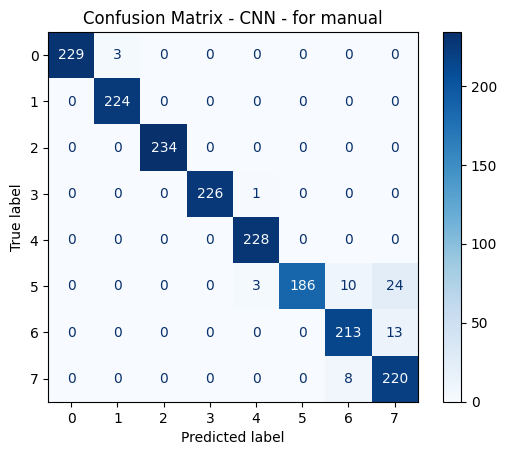

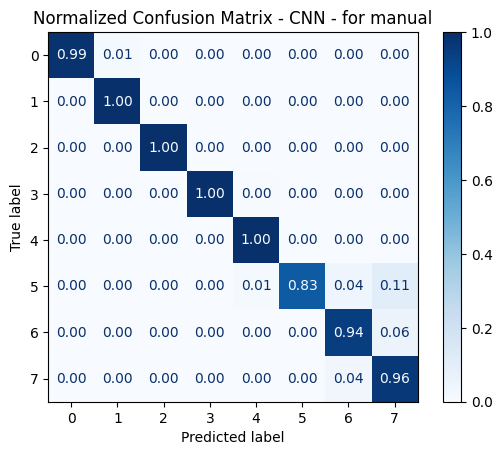

In [14]:
cm = confusion_matrix(y_flat1_val, predicted_labelsCNN_man, labels=np.arange(num_classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN - for manual")
plt.show()

cm = confusion_matrix(y_flat1_val, predicted_labelsCNN_man, labels=np.arange(num_classes))

row_sum = cm.sum(axis=1, keepdims=True)
row_sum[row_sum == 0] = 1

cm_normalized = cm.astype('float') / row_sum

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=np.arange(num_classes))
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # shows values with 2 decimal places
plt.title("Normalized Confusion Matrix - CNN - for manual")
plt.show()

(1439, 6)
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


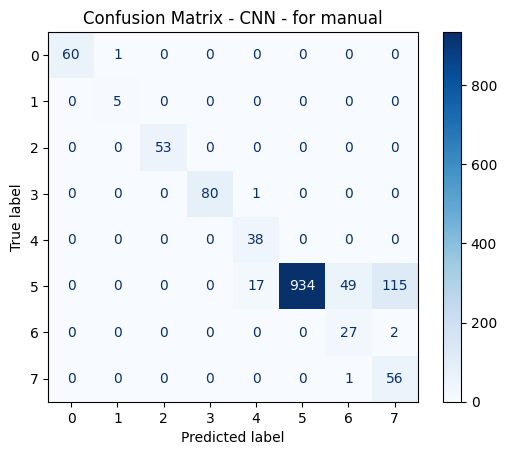

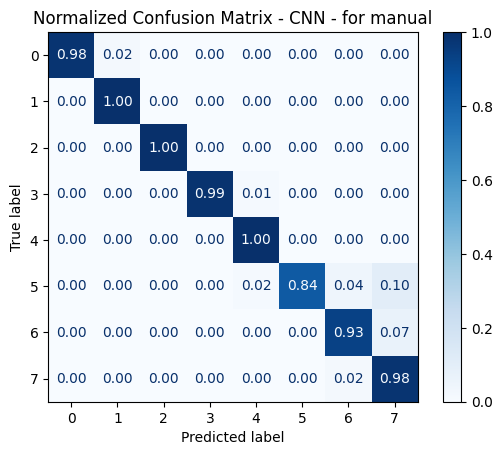

In [28]:
w_flat = windows.reshape(windows.shape[0], -1)
print(w_flat.shape)
y = model_CNN_man.predict(w_flat)
y_s = y.argmax(axis=1)
cm = confusion_matrix(labels, y_s, labels=np.arange(num_classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN - for manual")
plt.show()

cm = confusion_matrix(labels, y_s, labels=np.arange(8))

row_sum = cm.sum(axis=1, keepdims=True)
row_sum[row_sum == 0] = 1

cm_normalized = cm.astype('float') / row_sum

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=np.arange(8))
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # shows values with 2 decimal places
plt.title("Normalized Confusion Matrix - CNN - for manual")
plt.show()

In [31]:
weights = []
for layer in model_CNN_man.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        w, b = layer.get_weights()
        weights.append((w, b))

In [32]:
with open("model_weights_CNNmanual_TEST.h", "w") as f:
    for i, (w, b) in enumerate(weights):
        f.write(f"// Layer {i}\n")
        f.write(f"const float dense_{i}_weights[{w.shape[0]}][{w.shape[1]}] = {{\n")
        for row in w:
            f.write("    {" + ", ".join(map(str, row)) + "},\n")
        f.write("};\n")

        f.write(f"const float dense_{i}_bias[{len(b)}] = {{ {', '.join(map(str, b))} }};\n\n")

In [34]:
def to_c_array(name, arr):
    flat = arr.flatten(order='C')
    return f"const float {name}[{len(flat)}] = {{\n    " + \
        ",\n    ".join(", ".join(f"{x:.8f}" for x in flat[i:i+8]) for i in range(0, len(flat), 8)) + "\n};"

def export_dense_weights(model):
    output = ""
    dense_count = 0
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights, biases = layer.get_weights()
            w_name = f"dense_{dense_count}_weights"
            b_name = f"dense_{dense_count}_bias"
            output += f"// Layer {dense_count}\n"
            output += to_c_array(w_name, weights) + "\n\n"
            output += to_c_array(b_name, biases) + "\n\n"
            dense_count += 1
    return output

with open("model_weights_CNNmanual.h", "w") as f:
    f.write("#ifndef MODEL_WEIGHTS_CNNMANUAL_H\n#define MODEL_WEIGHTS_CNNMANUAL_H\n\n")
    f.write(export_dense_weights(model_CNN_man))
    f.write("#endif\n")